In [2]:
# pip install tensorflow numpy matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

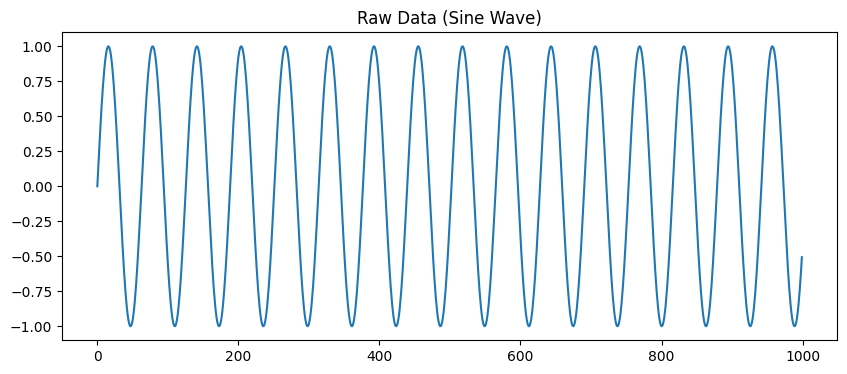

In [3]:
# 1. Generate Synthetic Data (Sine Wave)
t = np.linspace(0, 100, 1000)
data = np.sin(t)

plt.figure(figsize=(10,4))
plt.plot(data)
plt.title("Raw Data (Sine Wave)")
plt.show()

In [4]:
# 2. Data Preprocessing (Sliding Window)
def create_dataset(dataset, look_back=10):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        y.append(dataset[i + look_back])
    return np.array(X), np.array(y)

look_back = 20
X, y = create_dataset(data, look_back)

In [5]:
# Reshape input to be [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Split Data
train_size = int(len(X) * 0.8)
x_train, x_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (784, 20, 1), Test shape: (196, 20, 1)


In [7]:
# 3. Build the SimpleRNN Model
# The only difference from LSTM is using 'SimpleRNN' layer here
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(look_back, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\Mayank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 4. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3218 - val_loss: 0.0239
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0034
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 8.8602e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2732e-04 - val_loss: 5.3191e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4628e-04 - val_loss: 3.5897e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2844e-04 - val_loss: 2.7710e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3664e-04 - val_loss: 1.9057e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6362e-04 - val_loss: 1.3890e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2712e-04 - val_loss: 1.1739e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4879e-05 - val_loss: 7.9816e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1192e-05 - val_loss: 6.6395e-05
Epoch 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


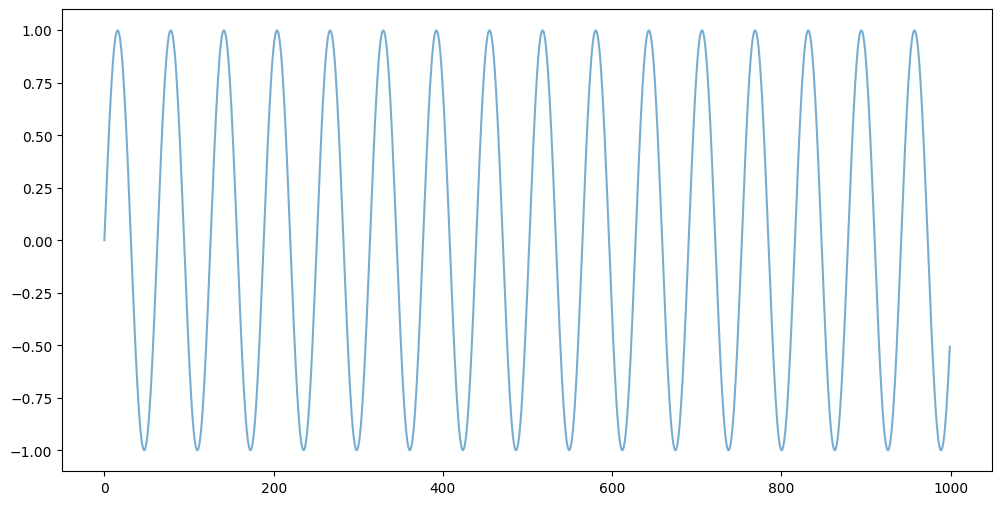

In [9]:
# 5. Make Predictions & Visualize
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.plot(np.arange(len(data)), data, label='Original Data', alpha=0.6)

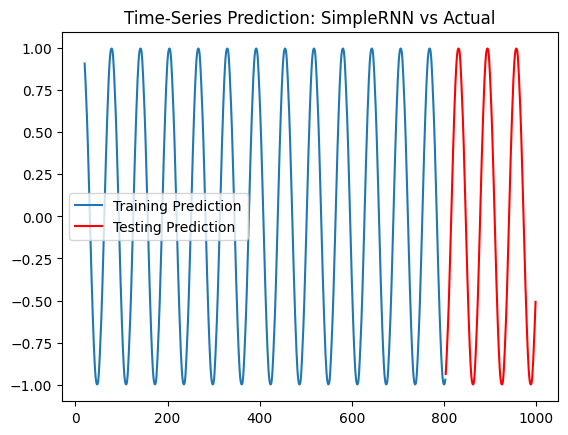

In [10]:
# Plot Training
train_plot = np.empty_like(data)
train_plot[:] = np.nan
train_plot[look_back:len(train_predict)+look_back] = train_predict.flatten()
plt.plot(train_plot, label='Training Prediction')

# Plot Testing
test_plot = np.empty_like(data)
test_plot[:] = np.nan
# Align test predictions (indices calculation)
test_plot[len(train_predict)+(look_back):len(data)] = test_predict.flatten()
plt.plot(test_plot, label='Testing Prediction', color='red')

plt.legend()
plt.title("Time-Series Prediction: SimpleRNN vs Actual")
plt.show()